##基礎演習S 後半第4回

NE21-1228F
鈴木　拓己

In [1]:
# 参考：インストール済みパッケージ
p <- installed.packages()
rownames(p)

[1] "IRdisplay"     "IRkernel"      "pbdZMQ"        "repr"         
  [5] "askpass"       "assertthat"    "backports"     "base64enc"    
  [9] "bit"           "bit64"         "blob"          "brew"         
 [13] "brio"          "broom"         "bslib"         "cachem"       
 [17] "callr"         "cellranger"    "cli"           "clipr"        
 [21] "colorspace"    "commonmark"    "cpp11"         "crayon"       
 [25] "credentials"   "curl"          "data.table"    "DBI"          
 [29] "dbplyr"        "desc"          "devtools"      "diffobj"      
 [33] "digest"        "dplyr"         "dtplyr"        "ellipsis"     
 [37] "evaluate"      "fansi"         "farver"        "fastmap"      
 [41] "forcats"       "fs"            "gargle"        "generics"     
 [45] "gert"          "ggplot2"       "gh"            "gitcreds"     
 [49] "glue"          "googledrive"   "googlesheets4" "gtable"       
 [53] "haven"         "highr"         "hms"           "htmltools"    
 [57] "httr"          "ids"           "ini"           "isoband"      
 [61] "jquerylib"     "jsonlite"      "knitr"         "labeling"     
 [65] "lifecycle"     "lubridate"     "magrittr"      "memoise"      
 [69] "mime"          "modelr"        "munsell"       "openssl"      
 [73] "pillar"        "pkgbuild"      "pkgconfig"     "pkgload"      
 [77] "praise"        "prettyunits"   "processx"      "progress"     
 [81] "ps"            "purrr"         "R6"            "rappdirs"     
 [85] "rcmdcheck"     "RColorBrewer"  "readr"         "readxl"       
 [89] "rematch"       "rematch2"      "remotes"       "reprex"       
 [93] "rlang"         "rmarkdown"     "roxygen2"      "rprojroot"    
 [97] "rstudioapi"    "rversions"     "rvest"         "sass"         
[101] "scales"        "selectr"       "sessioninfo"   "stringi"      
[105] "stringr"       "svglite"       "sys"           "systemfonts"  
[109] "testthat"      "tibble"        "tidyr"         "tidyselect"   
[113] "tidyverse"     "tinytex"       "tzdb"          "usethis"      
[117] "utf8"          "uuid"          "vctrs"         "viridisLite"  
[121] "vroom"         "waldo"         "whisker"       "withr"        
[125] "xfun"          "xml2"          "xopen"         "yaml"         
[129] "zip"           "base"          "boot"          "class"        
[133] "cluster"       "codetools"     "compiler"      "datasets"     
[137] "foreign"       "graphics"      "grDevices"     "grid"         
[141] "KernSmooth"    "lattice"       "MASS"          "Matrix"       
[145] "methods"       "mgcv"          "nlme"          "nnet"         
[149] "parallel"      "rpart"         "spatial"       "splines"      
[153] "stats"         "stats4"        "survival"      "tcltk"        
[157] "tools"         "utils"

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4


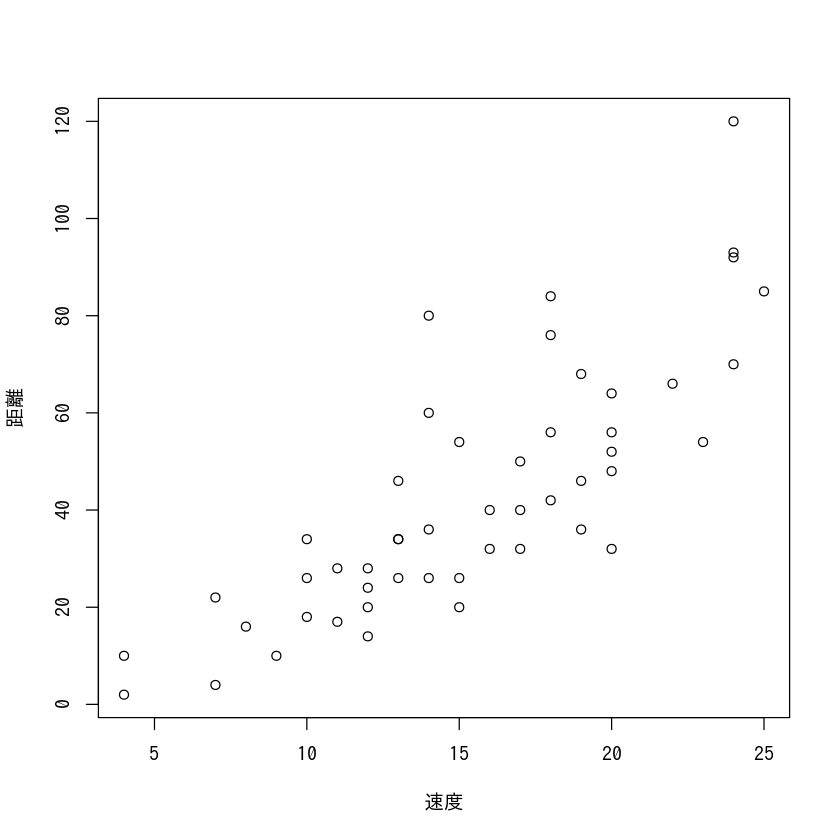

In [2]:
# 必要に応じて「ランタイム」＋「ランタイムを再起動」
# IPAフォントをインストール
system("apt-get install -y fonts-ipafont")
# フォント一覧を表示
# systemfonts::system_fonts()
# グラフィクスパラメータのフォントファミリーをIPAGothicに
par(family="IPAGothic")
# 確認（グラフでの日本語）
dat <- cars
head(dat, 3)
colnames(dat) <- c("速度","距離")
plot(dat)

In [3]:
# ライブラリ
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Ex.4-2： carsデータで多項式モデリング（変数選択）

In [16]:
# 関数定義（Ex.4-1～4-3用）
RMSE <- function(f, y) sqrt(mean((f-y)^2))
MAE <- function(f, y) mean(abs(f-y))
#---
g <- function(x, a){        # n次多項式によるモデル，aの要素は昇べき順
  n <- length(a)
  z <- a[n]
  if(n > 1){
    for(i in (n-1):1){        # 計算は降べき順
      z <- z*x + a[i]
    }
  }
  return(z)
}

In [17]:
# データ定義（Ex.4-1～4-3用）
X <- x0 <- data.frame(cars$speed)
for(i in 2:10) X <- cbind(X, X[,i-1]*x0)
colnames(X) <- paste0('x', 1:10)
# distを目的変数yとする
y <- cars$dist
# dはyとXをまとめたもの
d <- data.frame(y, X)
#---------------------------------------
# [1]
#（ランダムに）Xの70%を訓練データX1，残り30%をテストデータX2とする
set.seed(123)          # 乱数種設定　※再現性のため
n <- nrow(X); r <- 0.7
id <- sample(1:n, round(n*r)) %>% sort()

X1 <- X[id, ]
X2 <- X[-id, ]
d1 <- d[id,]
d2 <- d[-id,]

#変数idに1からn(Xの行数)の数を0.7✖️n回(四捨五入)サンプリング(seed値を設定しているため一定になる)を行い、昇順に並び替える。
#X1にはXのidに対応する行を代入し、X2にはXのidに対応しない行を代入する。
#d1にはdのidに対応する行を代入し、d2にはdのidに対応しない行を代入する。

In [18]:
dat <- data.frame(cars$speed,cars$dist)
dat1 <-dat[id,];colnames(dat1)[1] <- 'x';colnames(dat1)[2] <- 'y'
dat2 <-dat[-id,];colnames(dat2)[1] <- 'x';colnames(dat2)[2] <- 'y'


Call:
lm(formula = y ~ 1, data = d)

Residuals:
   Min     1Q Median     3Q    Max 
-40.98 -16.98  -6.98  13.02  77.02 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   42.980      3.644   11.79 6.38e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25.77 on 49 degrees of freedom


[1] "---------------------------------------"

[1] 23.41204

[1] 17.76629

[1] 29.83806

[1] 27.53467

[1] "---------------------------------------"

Start:  AIC=325.91
y ~ 1

       Df Sum of Sq   RSS    AIC
+ x2    1     21668 10871 273.09
+ x1    1     21186 11354 275.26
+ x3    1     21064 11475 275.80
+ x4    1     20107 12432 279.80
+ x5    1     19088 13450 283.74
+ x6    1     18122 14417 287.21
+ x7    1     17248 15291 290.15
+ x8    1     16477 16062 292.61
+ x9    1     15801 16738 294.67
+ x10   1     15208 17331 296.41
<none>              32539 325.91

Step:  AIC=273.09
y ~ x2

       Df Sum of Sq   RSS    AIC
<none>              10871 273.09
+ x10   1      63.5 10808 274.80
+ x9    1      51.6 10820 274.85
+ x1    1      46.4 10825 274.88
+ x8    1      38.5 10833 274.91
+ x7    1      25.1 10846 274.98
+ x6    1      12.7 10858 275.03
+ x3    1       5.6 10866 275.07
+ x5    1       3.4 10868 275.08
+ x4    1       0.0 10871 275.09
- x2    1   21667.8 32539 325.91



Call:
lm(formula = y ~ x2, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.448  -9.211  -3.594   5.076  45.862 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.86005    4.08633   2.168   0.0351 *  
x2           0.12897    0.01319   9.781  5.2e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.05 on 48 degrees of freedom
Multiple R-squared:  0.6659,	Adjusted R-squared:  0.6589 
F-statistic: 95.67 on 1 and 48 DF,  p-value: 5.2e-13


[1] "---------------------------------------"

[1] 11.74829

[1] 9.243465

[1] "---------------------------------------"

Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 12 row(s) containing missing values (geom_path).”


[1] "---------------------------------------"

[1] 20.06715

[1] 15.6023

[1] "---------------------------------------"

Warning message:
“Removed 12 row(s) containing missing values (geom_path).”


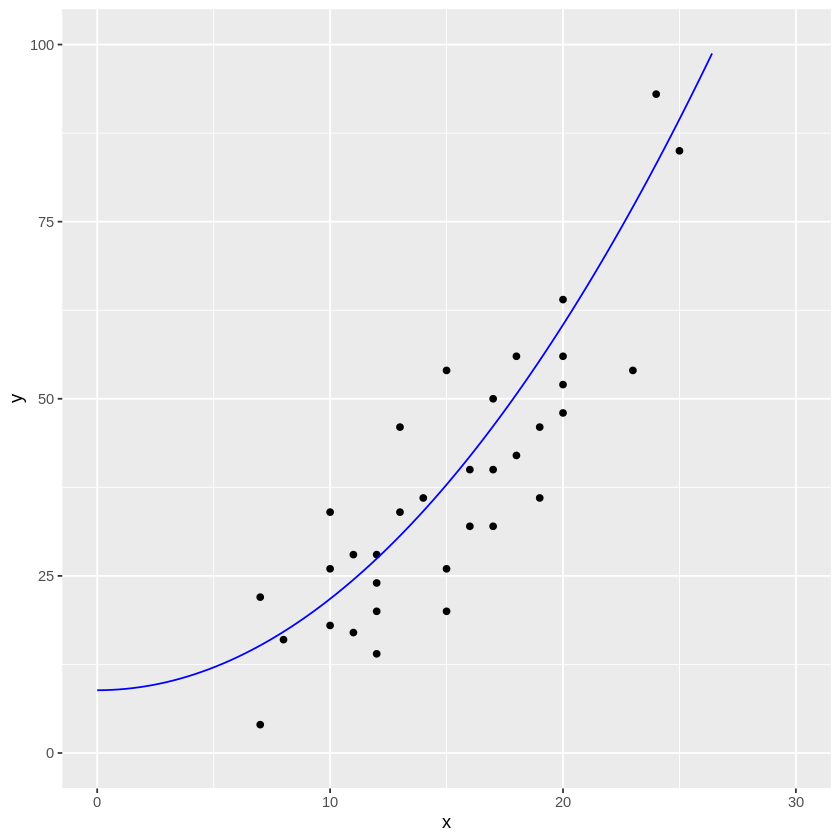

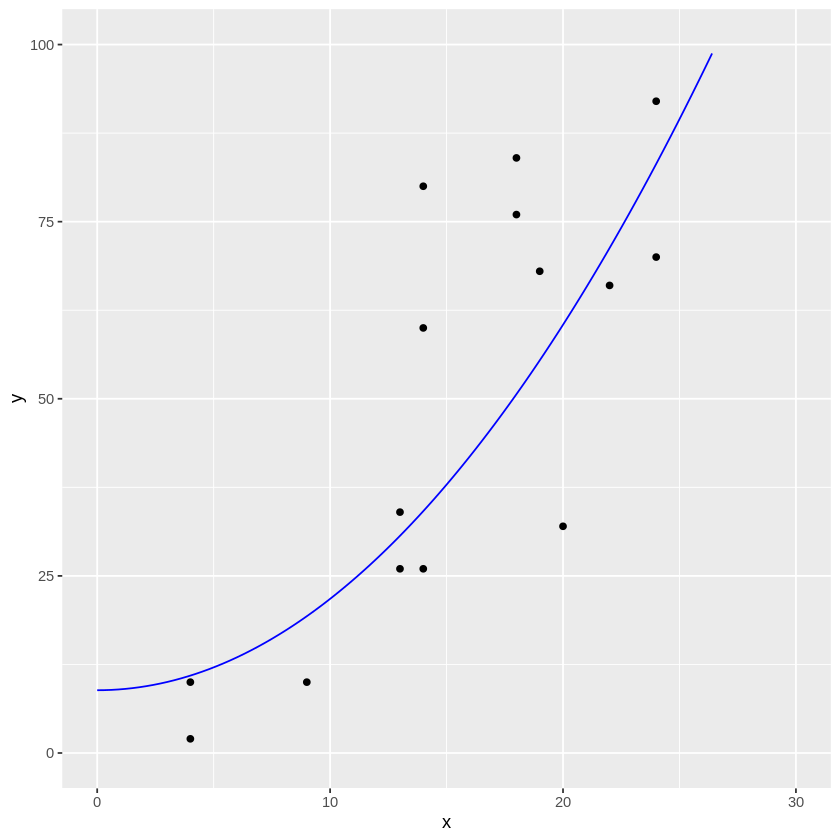

In [20]:
#####################################################
# Ex.4-2： carsデータで多項式モデリング（変数選択）
#####################################################
# [1] （切片だけの）定数項モデル（作成と有意性評価）

model2 <- lm(y~1, data=d)     # （切片だけの）定数項モデル
summary(model2)

"---------------------------------------"
# [2] 定数項モデルの残差　※定数項だけなので関数gは使えない

a2 <- model2$coefficients
RMSE(a2, dat1$y)
MAE(a2, dat1$y)

RMSE(a2, dat2$y)
MAE(a2, dat2$y)

"---------------------------------------"
# [3] 変数選択－（AIC情報量での）変数増減法によるモデル（作成と有意性評価）

model3 <- lm(y~., data=d)
model4 <- step(model2, direction="both", scope=list(lower=model2, upper=model3))
# ※「upper=model1」としても同じ結果となる
summary(model4)

"---------------------------------------"
# [4] 残差（訓練データ）

#c(a4[1:1], 0, a4[2:2])の値を調整した所残差が低くなり、予測パフォーマンスが向上した。
a4 <- model4$coefficients       # 係数（昇べき順）
a4 <- c(a4[1:1], 0, a4[2:2])    # x2の係数がないので修正！

RMSE(g(dat1$x, a4), dat1$y)
MAE(g(dat1$x, a4), dat1$y)

"---------------------------------------"
# [5] 視覚化（訓練データの散布図とモデル）
# モデルの当てはまり

ggplot(dat1, aes(x=x, y=y)) + geom_point() +
    stat_function(fun=g, args=list(a=a4), color="blue") +
    xlim(c(0, 30)) + ylim(c(0, 100))

"---------------------------------------"
# テストデータで検証
# [6] 残差（テストデータ）

RMSE(g(dat2$x, a4), dat2$y)
MAE(g(dat2$x, a4), dat2$y)

"---------------------------------------"
# テストデータで検証
# [7] 視覚化（テストデータの散布図とモデル）

ggplot(dat2, aes(x=x, y=y)) + geom_point() +
    stat_function(fun=g, args=list(a=a4), color="blue") +
    xlim(c(0, 30)) + ylim(c(0, 100))